In [42]:
#importazione pacchetti python necessari

import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt



In [6]:
#assegnazione seme per generazione numeri casuali

seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

# Esercizio 12.1

Modifico ed alleno per un numeo sufficiente di epoche la rete neurale che riconosce i numeri scritti in bianco su sfondo nero importati da MNIST. 

In [35]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


Riformatto i dati e le etichette in modo da poterli usare con la loss function categorical_crossentropy. E stampo un'immagine di esempio presa da MNIST.

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


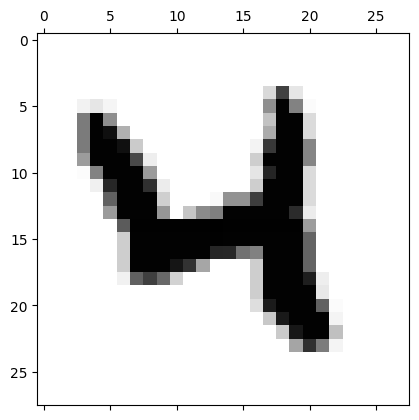

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [36]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

Costruisc un modello a più layer per la mia rete neurale, applico un dopout per evitare overfitting.

In [37]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


Compilo il modello con tre diversi ottimizzatori: ho scelto SGD, Nadam e RMSprop. Nella parte di valutazione della loss descriverò il comportamento dei tre ottimizzatori e la loro convergenza.  
Per il momento scegliete l'otimizzatore che vi sembra più opportuno.

In [38]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [20]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Nadam(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [ ]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

In [39]:
# training parameters
batch_size = 32
epochs = 60

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7709 - acc: 0.7714 - val_loss: 0.3175 - val_acc: 0.9127
Epoch 2/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3871 - acc: 0.8892 - val_loss: 0.2413 - val_acc: 0.9313
Epoch 3/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3120 - acc: 0.9104 - val_loss: 0.2027 - val_acc: 0.9417
Epoch 4/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2642 - acc: 0.9263 - val_loss: 0.1759 - val_acc: 0.9482
Epoch 5/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2328 - acc: 0.9350 - val_loss: 0.1600 - val_acc: 0.9532
Epoch 6/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2073 - acc: 0.9413 - val_loss: 0.1434 - val_acc: 0.9557
Epoch 7/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1880 - acc: 0.9468 - val_loss: 0.1297 - val_acc: 0.9612
Epoch 8/60
1875/1875 [==============================] - 5s 2ms

313/313 [==============================] - 0s 1ms/step - loss: 0.0611 - acc: 0.9812

Test loss: 0.06112006679177284
Test accuracy: 0.9811999797821045


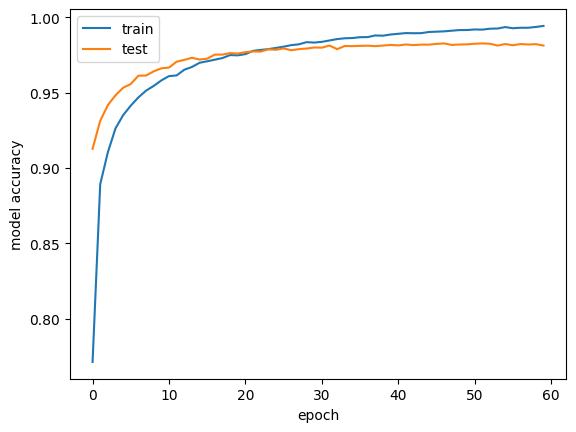

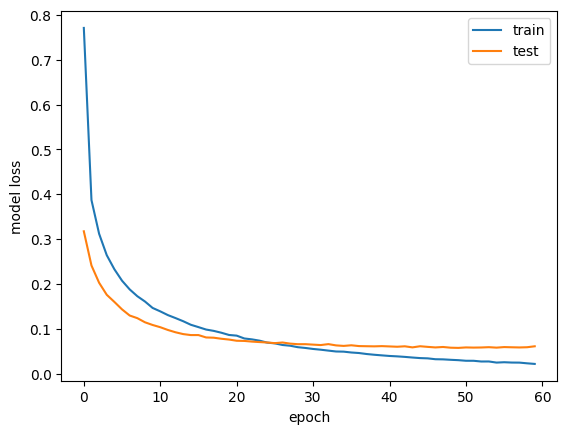

In [40]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

<pre>
Loss finale per ottimizzatore SGD:      test_loss = 0.06112006679177284    test_accuracy = 0.9811999797821045  
Loss finale per ottimizzatore Nadam:    test_loss = 0.22473149001598358    test_accuracy = 0.982699990272522  
Loss finale per ottimizzatore RMSprop:  test_loss =  0.21179775893688202   test_accuracy = 0.9818000197410583 

Le prestazione dei tre ottimizzatori sono paragonabili, dal punto di vista dell'accuracy, ossia che frazione delle predizioni sono giuste. SGD risulta però nettamente il migliore dal punto di vista della loss, quindi ha la tendenza a mantenere numeri più bassi nei neuroni di uscita che non sono quello di valore massimo. Inoltre osservando l'andamento rispetto al numero di passi della loss di RMSprop si nota che la loss di test tende a crescere mentre quella dei dati di training scede leggermente, questo è un chiaro segno che c'è overfitting.  
Ho deciso di usare 60 epoche, questo è un numero calibrato rispetto a SGD, perché attorno a questo numero di epoche la loss di test tende a stagnare.

313/313 [==============================] - 0s 1ms/step


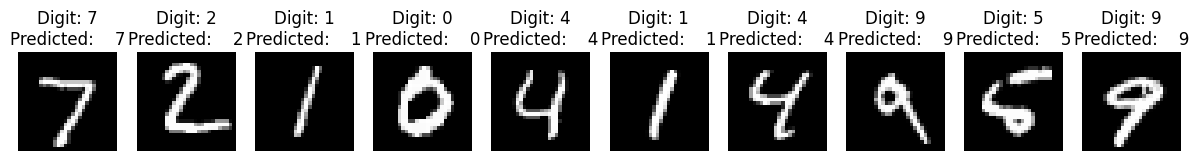

In [41]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

# Esercizio 12.2

Costruisco una rete neurale convoluzionale, che è in grado di riconoscere i pixel vicini e i loro pattern a zone, queste reti si pongono l'obiettivo di essere più efficaci nel riconoscimento di immagini. Spero quindi di ottenere risultati migliori della rete profonda standard nel riconoscimento dei numeri con questa seconda rete.

Per il funzionamento della rete convoluzionale i dati devono essere formattati nella forma originale dell'immagine, ossia in una matrice $28x28$. Quiindi prima di passare i dati alla rete neurale li devo riformattare dal vettore in cui erano messi precedentemente.

In [44]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [45]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(10))
    model.add(Flatten())

    # add a dense all-to-all relu layer
    model.add(Dense(200, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    

    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [46]:
# training parameters
batch_size = 32
epochs = 50 # INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4817 - acc: 0.5077 - val_loss: 0.5389 - val_acc: 0.8562
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5154 - acc: 0.8433 - val_loss: 0.2866 - val_acc: 0.9170
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3680 - acc: 0.8876 - val_loss: 0.2338 - val_acc: 0.9323
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3096 - acc: 0.9060 - val_loss: 0.1976 - val_acc: 0.9405
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2731 - acc: 0.9172 - val_loss: 0.1776 - val_acc: 0.9461
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2485 - acc: 0.9243 - val_loss: 0.1635 - val_acc: 0.9501
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2281 - acc: 0.9301 - val_loss: 0.1502 - val_acc: 0.9539
Epoch 8/50
1875/1875 [==============================] - 7s 4ms

(10000, 28, 28, 1)
313/313 [==============================] - 1s 2ms/step


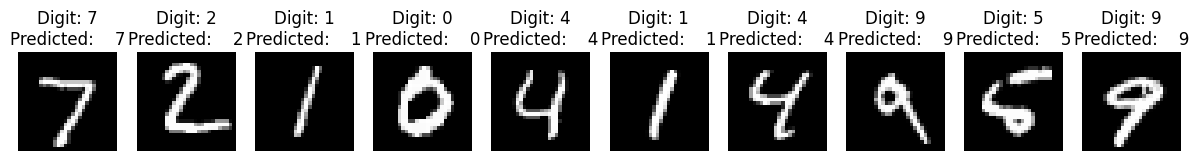

In [55]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
print(X_test.shape)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.0687 - acc: 0.9783

Test loss: 0.06870272755622864
Test accuracy: 0.9782999753952026


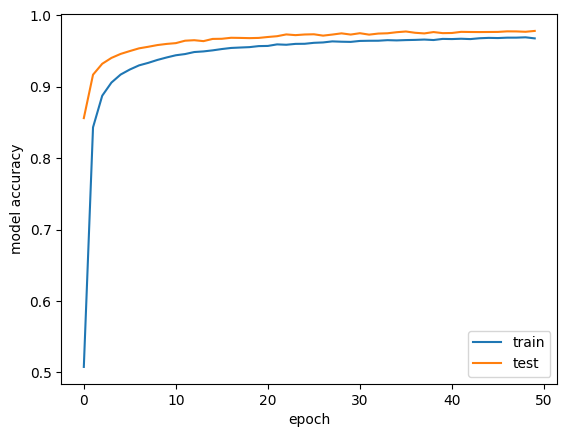

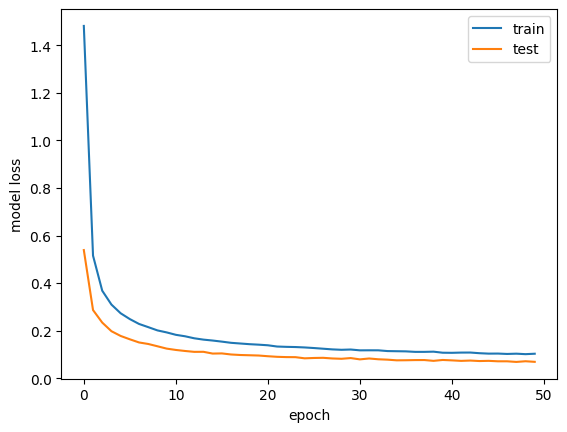

In [48]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

La rete convoluzionale ha una loss e una accuratezza in previsione paragonabile alla rete neurale profonda standard allenata con SGD, per comprenderne realmente le differenze provo a far valutare alle due reti neurali dei numeri al di fuori del campione MNISIT con cui sono state allenate e verificate.

# Esercizio 12.3

Ho prodotto con l'editor grafico gimp undici immagini di numeri scritti da me, le importo e le faccio valutare dalle due reti neurali costruite in precedenza. L'obiettivo è vedere come queste reti si comportano con numeri provenienti non dai loro dati di training e scritti da qualcuno che ha magari una calligrafia un po' diversa. Riuscire a comprendere numeri scritti da una persona diversa è un buon test dell'adattabilità delle reti neurali.

Innanzi tutto importo i miei numeri e ne mostro le immagini

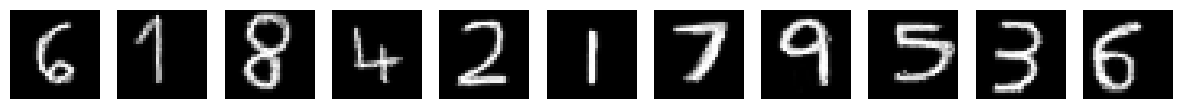

(28, 28)


In [58]:
plt.figure(figsize=(15, 15)) 
digit_filename = ["./Untitled.png","./Untitled2.png","./Untitled3.png","./Untitled4.png","./Untitled5.png","./Untitled6.png","./Untitled7.png","./Untitled8.png","./Untitled9.png","./Untitled10.png","./Untitled11.png"]
numeri = (6,1,8,4,2,1,7,9,5,3,6)
for z in range(11):
    
    digit_in = Image.open(digit_filename[z]).convert('L')

    ydim, xdim = digit_in.size

    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    ax = plt.subplot(2, 11, z + 1)    
    plt.imshow(data, cmap='gray')
    plt.axis('off') 
        

plt.show()

print(data.shape)

Poi mostro le previsioni, prima con la rete neurale profonda standard:

Image size: 28x28
1/1 [==============================] - 0s 13ms/step
Image size: 28x28
1/1 [==============================] - 0s 14ms/step
Image size: 28x28
1/1 [==============================] - 0s 16ms/step
Image size: 28x28
1/1 [==============================] - 0s 17ms/step
Image size: 28x28
1/1 [==============================] - 0s 16ms/step
Image size: 28x28
1/1 [==============================] - 0s 15ms/step
Image size: 28x28
1/1 [==============================] - 0s 15ms/step
Image size: 28x28
1/1 [==============================] - 0s 16ms/step
Image size: 28x28
1/1 [==============================] - 0s 16ms/step
Image size: 28x28
1/1 [==============================] - 0s 17ms/step
Image size: 28x28
1/1 [==============================] - 0s 16ms/step


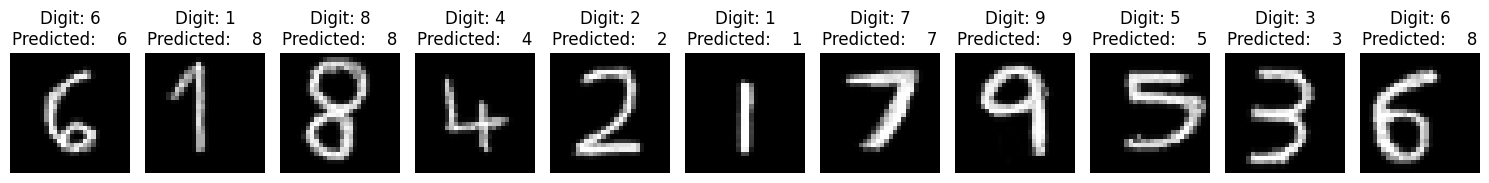

In [61]:
plt.figure(figsize=(15, 15)) 
for z in range(11):
    
    digit_in = Image.open(digit_filename[z]).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))

    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    ax = plt.subplot(2, 11, z + 1)    
    plt.imshow(data, cmap='gray')
    data = data.reshape(1,xdim*ydim)
    pred_0 = model_DNN.predict(data)
    plt.title("Digit: {}\nPredicted:    {}".format(numeri[z], np.argmax(pred_0)))
    plt.axis('off') 
        
plt.tight_layout()
plt.show()


E poi con la rete neurale convoluzionale:

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 15ms/step
Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 15ms/step
Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 15ms/step
Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 13ms/step
Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 16ms/step
Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 15ms/step
Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 15ms/step
Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 15ms/step
Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 14ms/step
Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 14ms/step
Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [=============

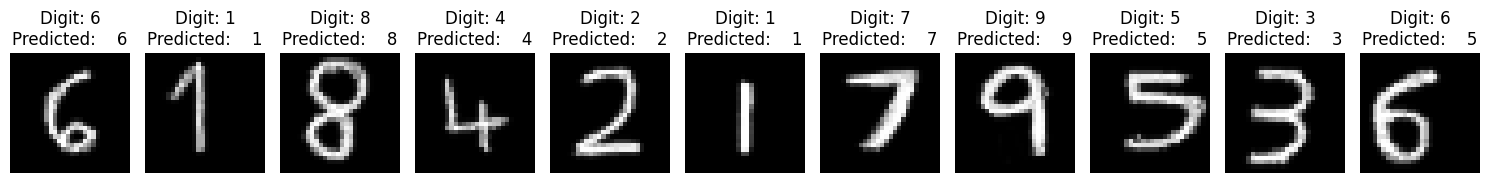

In [64]:
plt.figure(figsize=(15, 15)) 
for z in range(11):
    
    digit_in = Image.open(digit_filename[z]).convert('L')

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))

    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    ax = plt.subplot(2, 11, z + 1)    
    plt.imshow(data, cmap='gray')
    plt.axis('off') 
    
    print(data.shape)
    data = data.reshape(1,xdim,ydim,1)
    print(data.shape)
    pred_0 = model_CNN.predict(data)
    plt.title("Digit: {}\nPredicted:    {}".format(numeri[z], np.argmax(pred_0)))

plt.tight_layout()
plt.show()


Si nota innanzi tutto che la rete convoluzionale è riuscita a predire il numero "uno" che ho scritto come secondo numero mentre la rete neurale profonda no, il motivo per cui penso che la rete neurale profonda non sia riuscita a riconoscere l'"uno" è che gli "uno" che ho visto in MNIST(non li ho visti tutti) non avevano il cappuccio in alto. Penso che la differenza di grafia abbia confuso la rete, invece la rete convoluzionale potrebbe aver notato la linea verticale tipica dell'uno e aver quindi riconosciuto correttamente il numero, anche senza aver mai visto un "uno" scritto così. Un'altro fatto interessante riguarda il riconoscimento del "sei", l'undicesima immagine è come lo scrivo di solito, ma nonostaante molti tentativi non sono riuscito a far riconoscere a nessuna delle due reti il mio "sei". Ho poi guardato alcune immagini di sei dei dati di MNIST e mi sono accorto che tutti i "sei" erano scritti con un cerchio molto piccolo: ho imitato il cerchio tipico di quelle immagini(prima immagine di quelle caricate da me) e entrambe le reti neurali hanno immediatamente riconosciuto il numero. Questo è un evidente segno del fatto che queste reti non sono in grado di andare, anche di poco, a di fuori da quelle che sono le loro conoscenze: se gli viene richiesto di analizzare qualcosa di un poco differente dai loro dati di training hanno una forte tendenza a fallire. In poche parole una rete neurale può essere al massimo buona quanto i dati su cui viene allenata: non è in grado di generare nuove conscenze dal nulla.